# Data Analysis
Looking at our data and deriving columns / defining correlations

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os

In [6]:
#setting up path to database and engine

load_dotenv()
database_url = os.getenv('DATABASE_URL')

engine = create_engine(database_url)

In [7]:
# Creating view for hourly wage

with engine.connect() as connection:
    connection.execute(text("CREATE OR REPLACE VIEW hourly_wage AS SELECT employeeid, (salary_usd / 2080) AS hourly_wage FROM employee WHERE employment_type = 'FT'"))
    connection.commit()

In [8]:
# Remote work statistics

print("Average remote ratio for employees working at company in their country: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    'WHERE e.countryid = c.countryid', engine))


print("\nAverage remote ratio for employees NOT working at company in their country: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    'WHERE e.countryid <> c.countryid', engine))


print("\nAverage remote ratio for employees working at small company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'S'", engine))

print("\nAverage remote ratio for employees working at medium company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'M'", engine))

print("\nAverage remote ratio for employees working at large company: \n",
    pd.read_sql('' \
    'SELECT AVG(remote_ratio) ' \
    'FROM employee e JOIN company c ON e.companyid = c.companyid ' \
    "WHERE c.size = 'L'", engine))

Average remote ratio for employees working at company in their country: 
          avg
0  31.571568

Average remote ratio for employees NOT working at company in their country: 
          avg
0  86.538462

Average remote ratio for employees working at small company: 
          avg
0  67.819149

Average remote ratio for employees working at medium company: 
          avg
0  31.392918

Average remote ratio for employees working at large company: 
          avg
0  34.519231


In [9]:
print("Average salary by job: \n",
      pd.read_sql('' \
      'SELECT job_title, AVG(salary_usd) AS average_salary ' \
      'FROM employee GROUP BY job_title ORDER BY average_salary DESC', engine))

Average salary by job: 
                           job_title  average_salary
0               Software Engineer 2             NaN
1     Analytics Engineering Manager   399880.000000
2            Data Science Tech Lead   375000.000000
3          Head of Machine Learning   299758.428571
4    Managing Director Data Science   280000.000000
..                              ...             ...
151   Quantitative Research Analyst    51000.000000
152                 Insight Analyst    50090.642857
153         Compliance Data Analyst    45000.000000
154                CRM Data Analyst    40000.000000
155        Principal Data Architect    38154.000000

[156 rows x 2 columns]


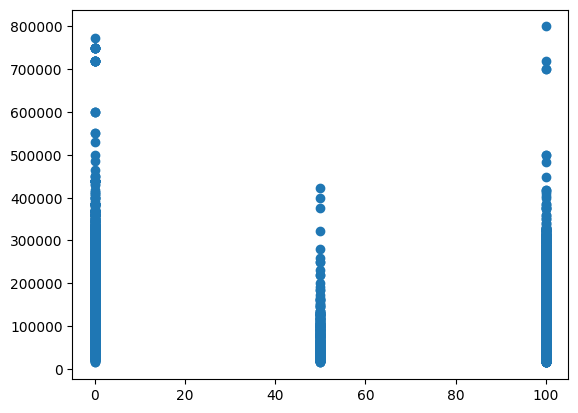

In [10]:
remoteVSpay = pd.read_sql("SELECT salary_usd, remote_ratio FROM employee", engine)
plt.scatter(remoteVSpay['remote_ratio'], remoteVSpay['salary_usd'])
plt.show()

In [11]:
payByCountry = pd.read_sql("SELECT c.name, AVG(e.salary_usd) AS country_avg_salary, COUNT(*) AS ct FROM employee e JOIN country c ON e.countryid = c.countryid GROUP BY c.name ORDER BY country_avg_salary DESC LIMIT 10", engine)
payByCountry.head(10)
# Qatar, Israel, Malaysia, Puerto Rico, USA, New Zealand, Canada, Saudi Arabia, Switzerland, Egypt


,name,country_avg_salary,ct
0,QA,300000.000000,1
1,IL,262515.000000,2
2,MY,200000.000000,1
3,PR,166000.000000,5
4,US,157169.207576,14467
5,NZ,146761.250000,8
6,CA,146334.463576,453
7,SA,139999.333333,3
8,CH,137187.500000,8
9,EG,135807.142857,14


In [12]:
payByCountryRevised = pd.read_sql("SELECT c.name, AVG(e.salary_usd) AS country_avg_salary, COUNT(*) AS ct FROM employee e JOIN country c ON e.countryid = c.countryid GROUP BY c.name HAVING COUNT(*) > 5 ORDER BY country_avg_salary DESC LIMIT 10", engine)
payByCountryRevised.head(10)

,name,country_avg_salary,ct
0,US,157169.207576,14467
1,NZ,146761.250000,8
2,CA,146334.463576,453
3,CH,137187.500000,8
4,EG,135807.142857,14
5,MX,134186.357143,14
6,AU,130023.611111,54
7,IE,104694.916667,12
8,DE,99150.346939,98
9,UA,98272.727273,11


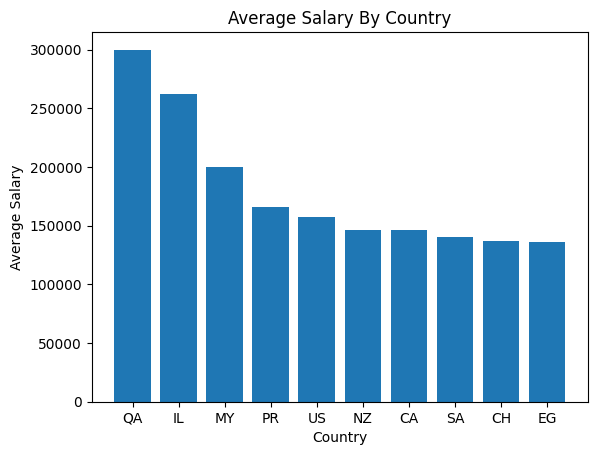

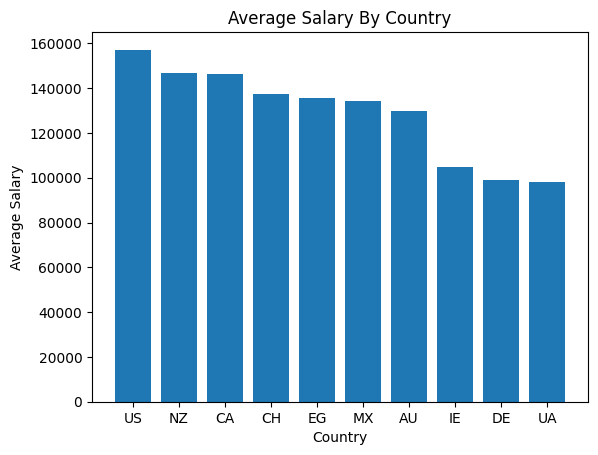

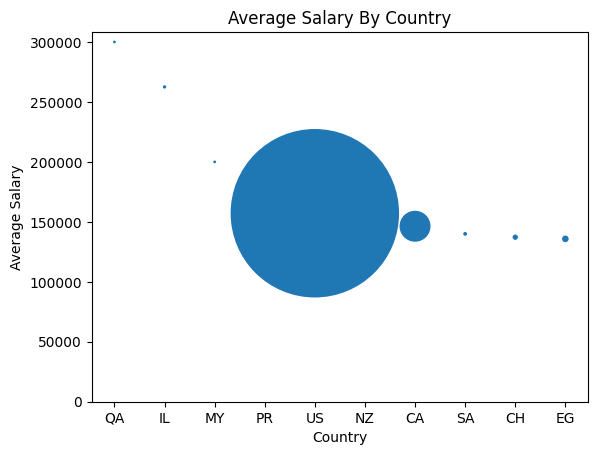

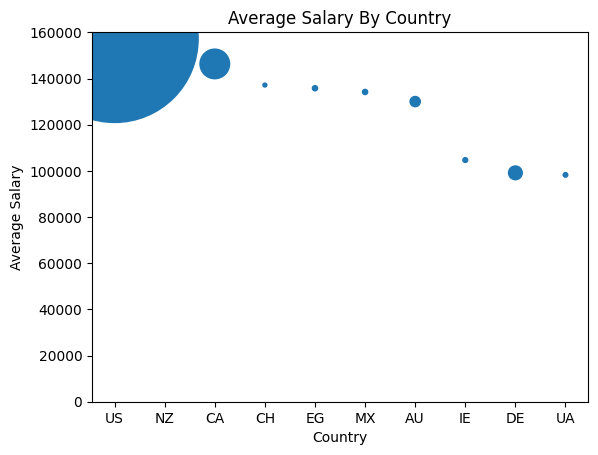

In [13]:
plt.bar(payByCountry['name'], payByCountry['country_avg_salary'])
plt.title('Average Salary By Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()
plt.bar(payByCountryRevised['name'], payByCountryRevised['country_avg_salary'])
plt.title('Average Salary By Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.show()

plt.scatter(payByCountry['name'], payByCountry['country_avg_salary'], payByCountry['ct'])
plt.title('Average Salary By Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.ylim(0, None)
plt.show()
plt.scatter(payByCountryRevised['name'], payByCountryRevised['country_avg_salary'], payByCountryRevised['ct'])
plt.title('Average Salary By Country')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.ylim(0, None)
plt.show()

In [14]:
payByCurrency = pd.read_sql("SELECT currency, AVG(salary_usd) AS currency_avg_salary, COUNT(*) AS ct FROM employee GROUP BY currency ORDER BY currency_avg_salary DESC LIMIT 10", engine)
payByCurrency.head(10)

,currency,currency_avg_salary,ct
0,ILS,262515.000000,2
1,USD,155931.618543,15295
2,CHF,137187.500000,8
3,NZD,125000.000000,1
4,CAD,108635.696429,56
5,NOK,88462.000000,2
6,SGD,81724.333333,6
7,GBP,79375.483766,616
8,AUD,78660.000000,12
9,HKD,65058.000000,1


In [15]:
payByCurrencyRevised = pd.read_sql("SELECT currency, AVG(salary_usd) AS currency_avg_salary, COUNT(*) AS ct FROM employee GROUP BY currency HAVING COUNT(*) > 5 ORDER BY currency_avg_salary DESC LIMIT 10", engine)
payByCurrency.head(10)

,currency,currency_avg_salary,ct
0,ILS,262515.000000,2
1,USD,155931.618543,15295
2,CHF,137187.500000,8
3,NZD,125000.000000,1
4,CAD,108635.696429,56
5,NOK,88462.000000,2
6,SGD,81724.333333,6
7,GBP,79375.483766,616
8,AUD,78660.000000,12
9,HKD,65058.000000,1


In [ ]:
print("Average salary by job (Top 10):\n",
      pd.read_sql(
          ''' SELECT job_title, AVG(salary_usd) AS average_salary, RANK() OVER (ORDER BY AVG(salary_usd) DESC) AS salary_rank
          FROM employee GROUP BY job_title ORDER BY average_salary DESC LIMIT 10 ''', engine
      )
)

Average salary by job (Top 10):
                         job_title  average_salary  salary_rank
0             Software Engineer 2             NaN            1
1   Analytics Engineering Manager   399880.000000            2
2          Data Science Tech Lead   375000.000000            3
3        Head of Machine Learning   299758.428571            4
4  Managing Director Data Science   280000.000000            5
5              AWS Data Architect   258000.000000            6
6                    AI Architect   252551.241379            7
7            Cloud Data Architect   250000.000000            8
8        Director of Data Science   218775.333333            9
9                    Head of Data   211860.196721           10
